# Lecture 1: Advanced Programming for AI

# Example 1: Using the `with` statement to open and save string data to a `txt` file.

* Note the `mode='w'` argument on the open clause;
    * `'r'` means read the file
    * `'w'` means write to the file
    * `'a'` means append to the end of the file
    * `'r+'` means read and write
    * `'w+'` means read and write, pre-existing contents deleted
    * `a+` means append to the end of a file, create if it doesn't exist already.

In [1]:
with open('string_lines.txt',mode='w') as text_document:
    text_document.write('99 Jimmy 55.8\n')
    text_document.write('100 Dianna 345.67\n')
    text_document.write('101 Wilber 456\n')
    text_document.write('102 Steven -234\n')
    text_document.write('103 Rober 224.62\n')

# Example 2: opening files without the `with` statement
* Need the `.close()` method at the end

In [ ]:
text_document = open('string_lines.txt','w')
text_document.write('Line 1\n')
text_document.write('Line 2\n')
text_document.close()

# Example 3: Saving a python dictionary to a `json` file

In [2]:
import json

credentials = {'user':'johndoe',
               'password':'qwert123',
               'account':'google.cloud.usa123.com',
               'database':'GCP'}

with open('credentials.json','w') as creds:
    json.dump(credentials,creds)

# Example 4: Loading a dictionary from a json file

In [5]:
import json
with open('credentials.json','r') as creds:
    credential = json.load(creds)
    
print(credential['user'])

johndoe


# Example 5: Saving a pickle File

* Use `wb` as the write mode for read binary.

In [2]:
string = 'This is a text document that will be saved to a pickle file.'
import pickle

with open('document.pickle','wb') as pickle_file:
    pickle.dump(string,pickle_file)

# Example 6: Loading a pickle File

* Use `rb` as the read mode (read binary)

In [3]:
with open('document.pickle','rb') as pickle_file:
    string_file = pickle.load(pickle_file)
print(string_file)

This is a text document that will be saved to a pickle file.


# Example 7: Deleting and renaming a file

In [6]:
import os

#rename the file
os.rename('string_lines.txt','other_name.txt')

#delete the file
os.remove('other_name.txt')

# Example 8: Error handling via `try except else`: Working with data input errors

In [10]:
try:
    number1 = int(input("Enter a string and see what happens: "))
except ValueError:
    print('Error Caught')
else:
    print('The code obviously worked because you input a number {}'.format(number1))

Enter a string and see what happens: g
Error Caught


# Example 9: Error handling: Working with the `finally` clause 

In [11]:
try:
    number1 = int(input("Enter a string and see what happens: "))
except ValueError:
    print('Error Caught')
else:
    print('The code obviously worked because you input a number {}'.format(number1))
finally:
    print('This code executes regardless of error')

Enter a string and see what happens: h
Error Caught
This code executes regardless of error


#  Example 10: Stack unwinding: When an error isn't caught, it causes stack unwinding

   * In the following example, the `except` clause catches a `TypeError`, where are previously we were catching `ValueError`. A `TypeError` wont replace a `ValueError`, thus

In [14]:
try:
    number1 = int(input("Enter a string and see what happens: "))
except TypeError:
    print('Error Caught')
else:
    print('The code obviously worked because you input a number {}'.format(number1))
finally:
    print('This code executes regardless of error')

Enter a string and see what happens: h
This code executes regardless of error


ValueError: invalid literal for int() with base 10: 'h'

# Example 11: CSV Files: Lets create a csv and write a few lines

### When writing rows to a data frame
* All rows must have the same number of columns
    * If an entry is missing put a null value.
* All columns should have matching data types

In [19]:
import csv

with open('statements.csv',mode='w',newline='') as statements:
    csv_input = csv.writer(statements)
    csv_input.writerow([25,'Mike',13.5])
    csv_input.writerow([50,'Jon',22.8])

# Example 12: Opening and reading a CSV file

* `f'{index:<8}{ID:<9}{value:>15}'` the `<` and `>` relations in this line of code indicate how spaced out the text will be relative to each other.

In [24]:
with open('statements.csv',mode='r',newline='') as statements:
    print(f'{"index":<8}{"ID":<9}{"Value":>15}')
    csv_data = csv.reader(statements)
    for row in csv_data:
        index,ID,value = row
        print(f'{index:<8}{ID:<9}{value:>15}')

index   ID                 Value
25      Mike                13.5
50      Jon                 22.8


# Example 13: Using Pandas to read a CSV

In [25]:
import pandas as pd

df = pd.read_csv('statements.csv',names=['index','ID','Value'])
df.head()

,index,ID,Value
0,25,Mike,13.5
1,50,Jon,22.8


# Example 14: Using pandas to explore a CSV file

In [4]:
link = 'https://raw.githubusercontent.com/JoeGanser/datasets/master/titanic.csv'
import pandas as pd
data = pd.read_csv(link)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
data[data['Sex']=='male']['Age'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

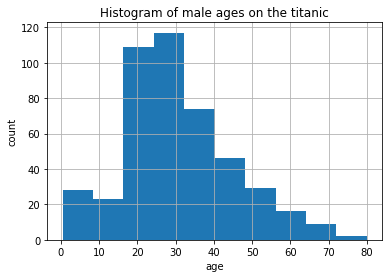

In [41]:
import matplotlib.pyplot as plt
data[data['Sex']=='male']['Age'].hist()
plt.xlabel('age')
plt.ylabel('count')
plt.title('Histogram of male ages on the titanic')
plt.show()